In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from matplotlib.colors import ListedColormap

In [38]:
import seaborn as sn
sn.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

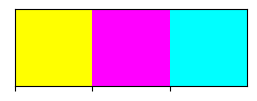

In [39]:
goldsilbronze = [ "#FFFF00","#FF00FF","#00FFFF"]
sn.palplot(sn.color_palette(goldsilbronze))
new_colorpalette=ListedColormap(sn.color_palette(goldsilbronze))

In [40]:
df = pd.read_csv(r"Udacity_final.csv",encoding='mac_roman')
df.head(3)

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"Data Modeling, Data Pipelines, Data Lakes, Spa..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","Data Wrangling, Matplotlib, Bootstrapping, Pan..."


In [41]:
ml = df[df["Skills"].str.contains("Android Development").fillna(False)]
ml.head()

,Course_Name,Organization,Level,Rating,Link,About,Skills
26,Android Kotlin Developer,School of Programming & Development,Intermediate,4.7,https://www.udacity.com//course/android-kotlin...,"Master Android app development with Kotlin, a ...","Android Development, Kotlin, Android Studio, G..."
54,Android Basics,School of Programming & Development,Beginner,4.8,https://www.udacity.com//course/android-basics...,No programming experience? No Problem! Start d...,"Android Development, Java programming, Android..."
133,Android Basics: Multiscreen Apps,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,Learn to build multiple screens and link them ...,"Android Development, Intents and Activities, D..."
137,Android Basics: User Input,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,Learn how to make your apps interactive using ...,"Android Development, Java, Object-Oriented Pro..."
138,Android Performance,School of Programming & Development,advanced,None,https://www.udacity.com//course/android-perfor...,"Performance matters to users, so it must matte...","Android Development, Performance, Optimization"


In [42]:
andr_dev5 = ml.sort_values(by="Rating",ascending=False).head()
andr_dev5

,Course_Name,Organization,Level,Rating,Link,About,Skills
154,Android Basics: Networking,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,This class teaches the basics of networking us...,"Android Development, JSON Parsing, HTTP Networ..."
156,Android Basics: Data Storage,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,"In this course, you'll learn the basics of dat...","Android Development, SQLite, ContentProvider, ..."
241,Firebase Analytics: Android,School of Programming & Development,Intermediate,None,https://www.udacity.com//course/firebase-analy...,Learn how to grow an app's user base using Fir...,"Android Development, Firebase, Analytics"
233,Firebase in a Weekend: iOS,School of Programming & Development,Intermediate,None,https://www.udacity.com//course/firebase-in-a-...,This course will teach you when and why to cho...,Android Development
210,Firebase in a Weekend: Android,School of Programming & Development,Intermediate,None,https://www.udacity.com//course/firebase-in-a-...,This course will teach you when and why to cho...,Android Development


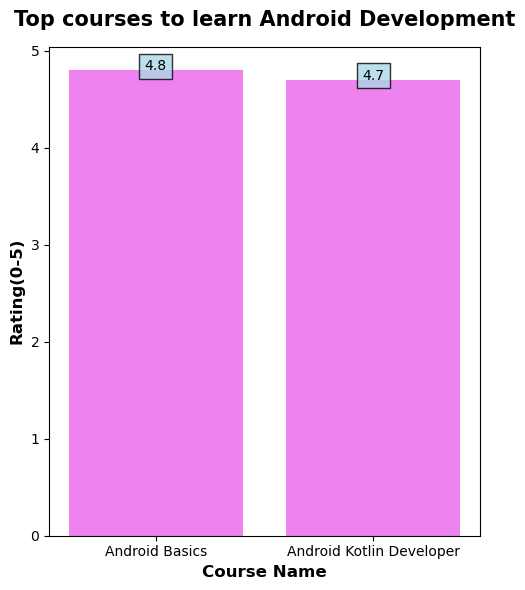

In [43]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',bbox = dict(facecolor = 'lightblue', alpha =.8))
        
x = ["Android Basics","Android Kotlin Developer"]
y = [4.8,4.7]
plt.figure(figsize=(5,6))
plt.bar(x,y,color="violet")
plt.xlabel("Course Name",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Rating(0-5)",fontdict={"fontweight":"bold","fontsize":12})
plt.title("Top courses to learn Android Development",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
addlabels(x,y)
plt.tight_layout();

In [44]:
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

Level                      
Level                               Beginner Intermediate advanced
Organization                                                      
School of Programming & Development        6           10        3

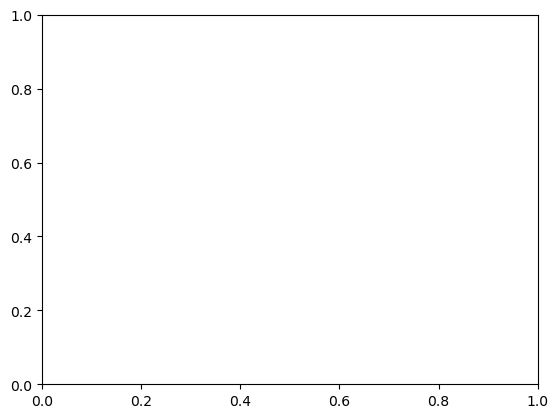

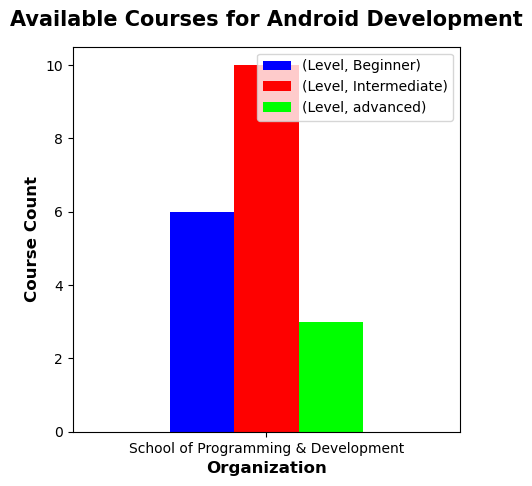

In [45]:
fig,ax = plt.subplots()
ax=ml_orgs.plot(kind="bar",cmap="brg",figsize=(5,5));
ax.set_title("Available Courses for Android Development",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xticklabels(["School of Programming & Development"],rotation=0)
ax.legend();

In [46]:
df['Rating'].replace('None', np.nan, inplace=True)

In [47]:
df.Rating.fillna(0,inplace=True)

In [48]:
df.Rating.isna().sum()

0

In [49]:
df.Rating = df.Rating.astype("float")

In [50]:
mlcourse = df[df["Skills"].str.contains("Android Development").fillna(False)]
mlcourse

,Course_Name,Organization,Level,Rating,Link,About,Skills
26,Android Kotlin Developer,School of Programming & Development,Intermediate,4.7,https://www.udacity.com//course/android-kotlin...,"Master Android app development with Kotlin, a ...","Android Development, Kotlin, Android Studio, G..."
54,Android Basics,School of Programming & Development,Beginner,4.8,https://www.udacity.com//course/android-basics...,No programming experience? No Problem! Start d...,"Android Development, Java programming, Android..."
133,Android Basics: Multiscreen Apps,School of Programming & Development,Beginner,0.0,https://www.udacity.com//course/android-basics...,Learn to build multiple screens and link them ...,"Android Development, Intents and Activities, D..."
137,Android Basics: User Input,School of Programming & Development,Beginner,0.0,https://www.udacity.com//course/android-basics...,Learn how to make your apps interactive using ...,"Android Development, Java, Object-Oriented Pro..."
138,Android Performance,School of Programming & Development,advanced,0.0,https://www.udacity.com//course/android-perfor...,"Performance matters to users, so it must matte...","Android Development, Performance, Optimization"
141,Gradle for Android and Java,School of Programming & Development,advanced,0.0,https://www.udacity.com//course/gradle-for-and...,Build bigger and better Android and Java apps ...,"Android Development, Gradle, Java"
142,Build Native Mobile Apps with Flutter,School of Programming & Development,Intermediate,0.0,https://www.udacity.com//course/build-native-m...,Learn from experts at Google how to use Flutte...,Android Development
145,Android Basics: User Interface,School of Programming & Development,Beginner,0.0,https://www.udacity.com//course/android-basics...,Learn how to design your first layout in Andro...,"Android Development, Building Layouts, Android..."
149,advancedAndroid App Development,School of Programming & Development,advanced,0.0,https://www.udacity.com//course/advanced-andro...,Make your app production-ready by applying adv...,"Android Development, Fragments, Libraries, Fir..."
154,Android Basics: Networking,School of Programming & Development,Beginner,0.0,https://www.udacity.com//course/android-basics...,This class teaches the basics of networking us...,"Android Development, JSON Parsing, HTTP Networ..."


In [51]:
mlcourse.groupby(["Organization"]).agg({"Level" : "count","Rating":"mean"})

,Level,Rating
Organization,,
School of Programming & Development,19,0.5


In [52]:
mlcourse[mlcourse["Rating"]>0.0]

,Course_Name,Organization,Level,Rating,Link,About,Skills
26,Android Kotlin Developer,School of Programming & Development,Intermediate,4.7,https://www.udacity.com//course/android-kotlin...,"Master Android app development with Kotlin, a ...","Android Development, Kotlin, Android Studio, G..."
54,Android Basics,School of Programming & Development,Beginner,4.8,https://www.udacity.com//course/android-basics...,No programming experience? No Problem! Start d...,"Android Development, Java programming, Android..."


In [53]:
ml_orgs.columns

MultiIndex([('Level',     'Beginner'),
            ('Level', 'Intermediate'),
            ('Level',     'advanced')],
           names=[None, 'Level'])

In [54]:
ml = df[df["Skills"].str.contains("Machine Learning").fillna(False)]
ml

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
12,Machine Learning Engineer,School of Artificial Intelligence,Intermediate,4.6,https://www.udacity.com//course/machine-learni...,Become a machine learning engineer and apply p...,"Machine Learning, Supervised Learning, Unsuper..."
17,Machine Learning DevOps Engineer,School of Artificial Intelligence,advanced,0.0,https://www.udacity.com//course/machine-learni...,"In this program,you will build theDevOps skill...","API development, Automated model scoring, CI..."
32,Natural Language Processing,School of Artificial Intelligence,advanced,4.5,https://www.udacity.com//course/natural-langua...,Learn the skills to get computers to understan...,"Machine Learning, Speech Recognition, Sentimen..."
35,Intro to Self-Driving Cars,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/intro-to-self-...,This introductory program is the perfect way t...,"Computer Vision, Machine Learning, Vehicle Mot..."
40,Intro to Machine Learning with PyTorch,School of Artificial Intelligence,Intermediate,4.7,https://www.udacity.com//course/intro-to-machi...,"Build a solid foundation in Supervised, Unsupe...","Introduction to Machine Learning, Supervised L..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."
52,Machine Learning Engineer for Microsoft Azure,School of Artificial Intelligence,Intermediate,4.5,https://www.udacity.com//course/machine-learni...,Strengthen your machine learning skills and bu...,"Azure Machine Learning, Azure Machine Learning..."
61,Data Science for Business Leaders,School of Business,Intermediate,4.4,https://www.udacity.com//course/data-science-f...,"Master the people, platforms, and processes re...","Business Strategy, Data Science, Data Architec..."
73,Introduction to Machine Learning using Microso...,School of Artificial Intelligence,Intermediate,0.0,https://www.udacity.com//course/introduction-t...,Gain a high-level introduction to the field of...,"Machine Learning, Azure, Model Training, Su..."


In [55]:
ml_top5 = ml.sort_values(by="Rating",ascending=False).head(5)
ml_top5 

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
40,Intro to Machine Learning with PyTorch,School of Artificial Intelligence,Intermediate,4.7,https://www.udacity.com//course/intro-to-machi...,"Build a solid foundation in Supervised, Unsupe...","Introduction to Machine Learning, Supervised L..."
12,Machine Learning Engineer,School of Artificial Intelligence,Intermediate,4.6,https://www.udacity.com//course/machine-learni...,Become a machine learning engineer and apply p...,"Machine Learning, Supervised Learning, Unsuper..."
35,Intro to Self-Driving Cars,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/intro-to-self-...,This introductory program is the perfect way t...,"Computer Vision, Machine Learning, Vehicle Mot..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."


In [56]:
ml_top5_cname_org = ml_top5
ml_top5_cname_org

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
40,Intro to Machine Learning with PyTorch,School of Artificial Intelligence,Intermediate,4.7,https://www.udacity.com//course/intro-to-machi...,"Build a solid foundation in Supervised, Unsupe...","Introduction to Machine Learning, Supervised L..."
12,Machine Learning Engineer,School of Artificial Intelligence,Intermediate,4.6,https://www.udacity.com//course/machine-learni...,Become a machine learning engineer and apply p...,"Machine Learning, Supervised Learning, Unsuper..."
35,Intro to Self-Driving Cars,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/intro-to-self-...,This introductory program is the perfect way t...,"Computer Vision, Machine Learning, Vehicle Mot..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."


In [57]:
ml_cn_org = ml_top5_cname_org.drop(columns=["Link","About","Skills"])
ml_cn_org

,Course_Name,Organization,Level,Rating
1,Data Scientist,School of Data Science,advanced,4.7
40,Intro to Machine Learning with PyTorch,School of Artificial Intelligence,Intermediate,4.7
12,Machine Learning Engineer,School of Artificial Intelligence,Intermediate,4.6
35,Intro to Self-Driving Cars,School of Autonomous Systems,Intermediate,4.6
49,AI for Business Leaders,School of Business,Intermediate,4.6


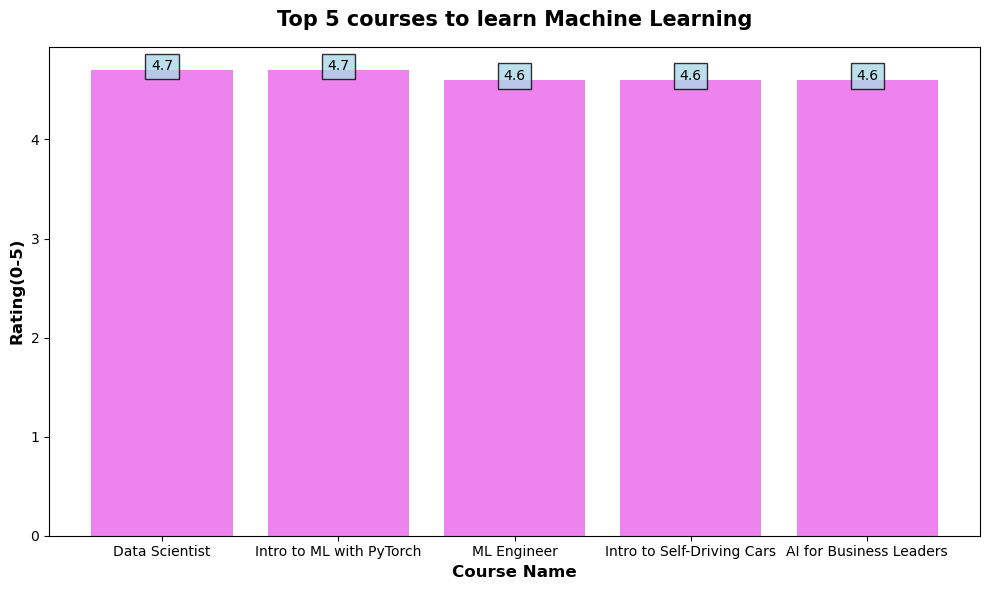

In [58]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',bbox = dict(facecolor = 'lightblue', alpha =.8))
        
x = ["Data Scientist","Intro to ML with PyTorch","ML Engineer","Intro to Self-Driving Cars","AI for Business Leaders"]
y = np.array(list(ml_cn_org["Rating"]))
plt.figure(figsize=(10,6))
plt.bar(x,y,color="violet")
plt.xlabel("Course Name",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Rating(0-5)",fontdict={"fontweight":"bold","fontsize":12})
plt.title("Top 5 courses to learn Machine Learning",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
addlabels(x,y)
plt.tight_layout();

In [59]:
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

Level                      
Level                             Beginner Intermediate advanced
Organization                                                    
Career Advancement                       0            1        0
School of Artificial Intelligence        1            8        2
School of Autonomous Systems             0            1        0
School of Business                       0            2        0
School of Data Science                   0            1        1

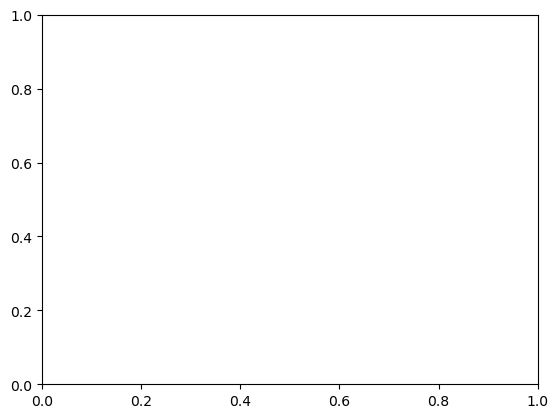

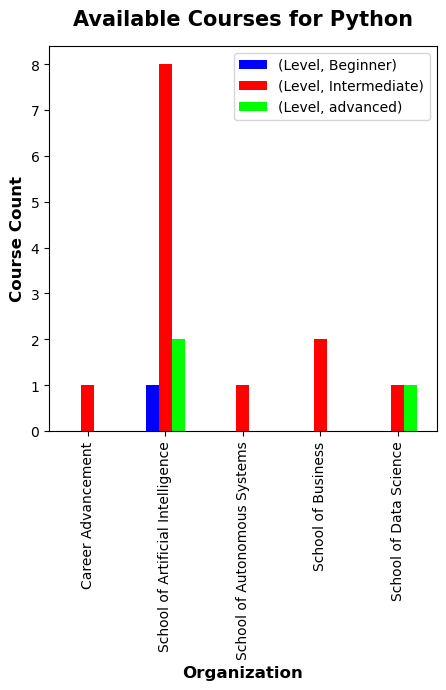

In [60]:
fig,ax = plt.subplots()
ax=ml_orgs.plot(kind="bar",cmap="brg",figsize=(5,5));
ax.set_title("Available Courses for Python",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.legend();

In [61]:
ml[ml["Rating"]>0.0].groupby(["Organization"]).agg({"Level" : "count","Rating":"mean"})

,Level,Rating
Organization,,
School of Artificial Intelligence,4,4.575
School of Autonomous Systems,1,4.600
School of Business,2,4.500
School of Data Science,1,4.700


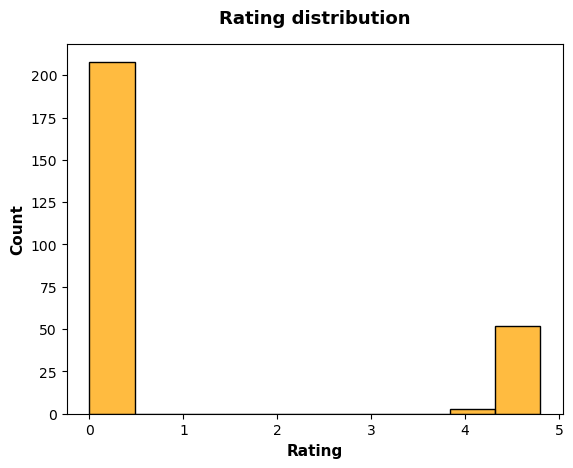

In [62]:
import seaborn as sns
sns.histplot(data=df, x="Rating",color="orange")
plt.title("Rating distribution",fontdict={"fontweight":"bold","fontsize":13},pad=15.0)
plt.xlabel("Rating",fontdict={"fontweight":"bold","fontsize":11})
plt.ylabel("Count",fontdict={"fontweight":"bold","fontsize":11});

In [63]:
rating = df[df["Rating"]>0.0].groupby(["Organization"]).agg({"Rating":"mean"})
rating

,Rating
Organization,
School of Artificial Intelligence,4.623077
School of Autonomous Systems,4.600000
School of Business,4.616667
School of Cloud Computing,4.500000
School of Cybersecurity,4.500000
School of Data Science,4.575000
School of Product Management,4.540000
School of Programming & Development,4.575000


In [64]:
rating.Rating = round(rating.Rating,2)

In [65]:
x = ["SOF AI","SOF Autonomous Systems","SOF Business","SOF Cloud Computing","SOF Cybersecurity","SOF Data Science","SOF Product Management","SOF Prog & Dev"]

In [66]:
y= list(rating.Rating)

In [67]:
y = np.array(y)

In [68]:
y,y.shape

(array([4.62, 4.6 , 4.62, 4.5 , 4.5 , 4.58, 4.54, 4.58]), (8,))

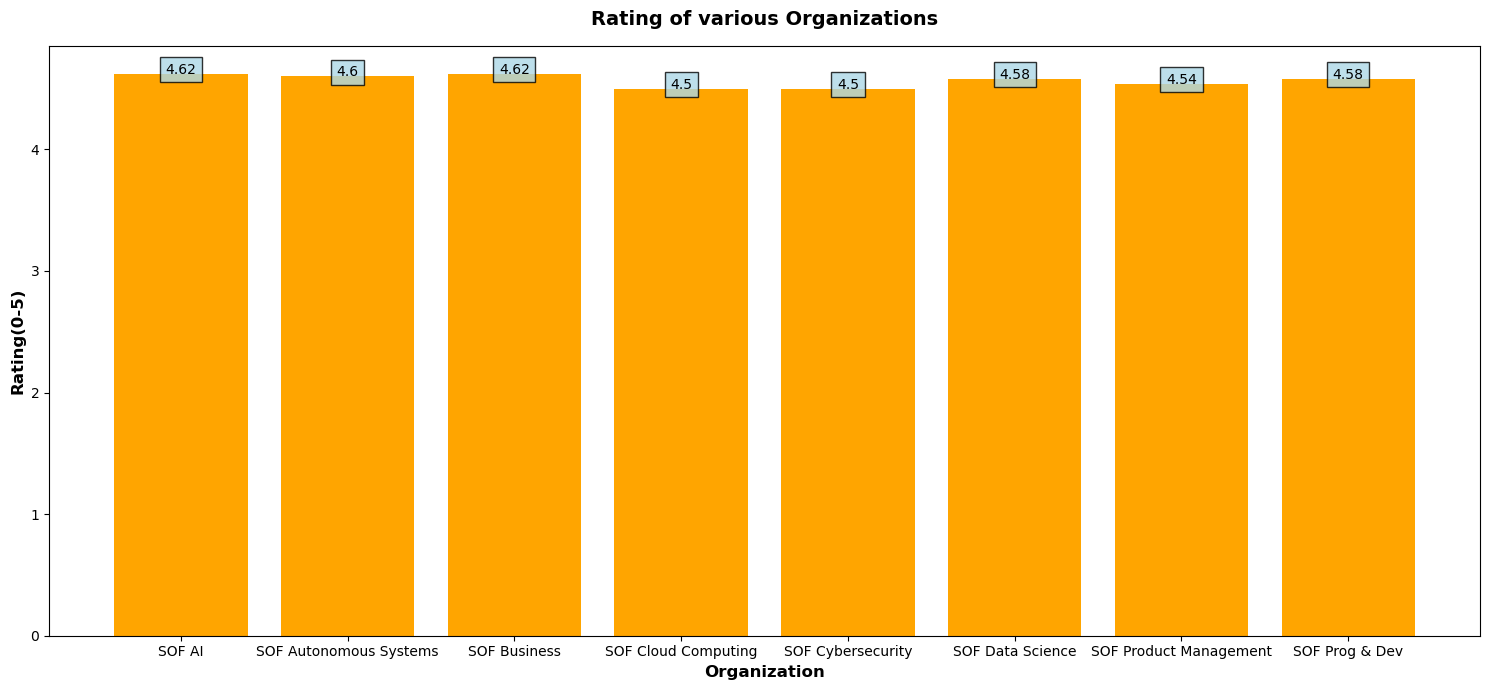

In [69]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',bbox = dict(facecolor = 'lightblue', alpha =.8))
plt.figure(figsize=(15,7))  
plt.bar(x,y,color="orange")
plt.title("Rating of various Organizations",fontdict={"fontweight":"bold","fontsize":14},pad=15.0)
plt.xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Rating(0-5)",fontdict={"fontweight":"bold","fontsize":12})
addlabels(x, y)
plt.tight_layout()

In [70]:
ml = df[df["Skills"].str.contains("Artificial Intelligence").fillna(False)]
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

Level                      
Level                             Beginner Intermediate advanced
Organization                                                    
School of Artificial Intelligence        1            2        1
School of Business                       0            1        0

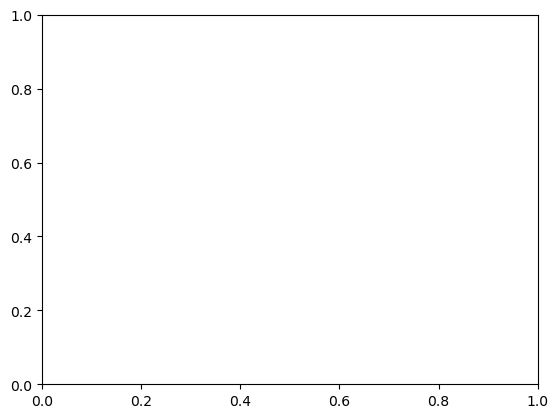

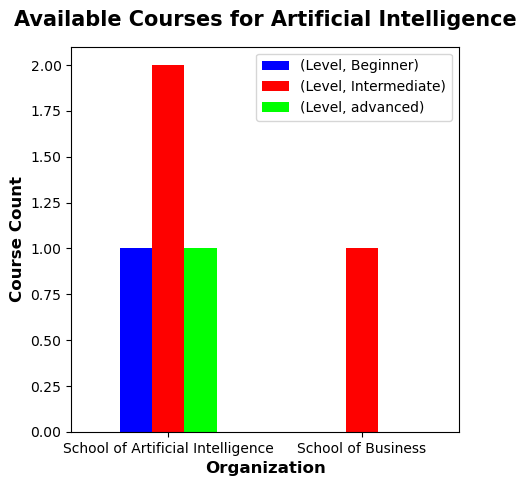

In [86]:
fig,ax = plt.subplots()
ax=ml_orgs.plot(kind="bar",cmap="brg",figsize=(5,5));
ax.set_title("Available Courses for Artificial Intelligence",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xticklabels(["School of Artificial Intelligence","School of Business"],rotation=0)
ax.legend();

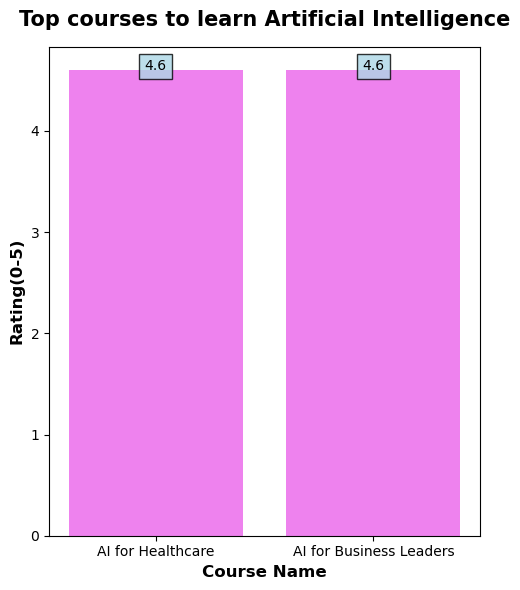

In [84]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',bbox = dict(facecolor = 'lightblue', alpha =.8))
        
x = ["AI for Healthcare","AI for Business Leaders"]
y = [4.6,4.6]
plt.figure(figsize=(5,6))
plt.bar(x,y,color="violet")
plt.xlabel("Course Name",fontdict={"fontweight":"bold","fontsize":12})
plt.ylabel("Rating(0-5)",fontdict={"fontweight":"bold","fontsize":12})
plt.title("Top courses to learn Artificial Intelligence",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
addlabels(x,y)
plt.tight_layout();

In [75]:
ml = df[df["Skills"].str.contains("Artificial Intelligence").fillna(False)]
ml
ml_top5 = ml.sort_values(by="Rating",ascending=False).head(5)
ml_top5 

,Course_Name,Organization,Level,Rating,Link,About,Skills
21,AI for Healthcare,School of Artificial Intelligence,advanced,4.6,https://www.udacity.com//course/ai-for-healthc...,Be at the forefront of the revolution of AI in...,"Artificial Intelligence, 2D Medical Imaging, 3..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."
74,AI Fundamentals,School of Artificial Intelligence,Beginner,0.0,https://www.udacity.com//course/ai-fundamental...,AI Fundamentals is an entry point into the wor...,"Artificial Intelligence, Machine Learning, A..."
80,Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0,https://www.udacity.com//course/artificial-int...,This course gives a survey of topics in AI alo...,"Artificial Intelligence, Probability, Bayesian..."
95,Intro to Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0,https://www.udacity.com//course/intro-to-artif...,This course will introduce you to the basics o...,"Artificial Intelligence, Machine Learning, Pro..."


In [77]:
ml_cn_org = ml_top5_cname_org.drop(columns=["Link","About","Skills"])
ml_cn_org

,Course_Name,Organization,Level,Rating
21,AI for Healthcare,School of Artificial Intelligence,advanced,4.6
49,AI for Business Leaders,School of Business,Intermediate,4.6
74,AI Fundamentals,School of Artificial Intelligence,Beginner,0.0
80,Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0
95,Intro to Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0


In [76]:
ml_top5_cname_org = ml_top5
ml_top5_cname_org

,Course_Name,Organization,Level,Rating,Link,About,Skills
21,AI for Healthcare,School of Artificial Intelligence,advanced,4.6,https://www.udacity.com//course/ai-for-healthc...,Be at the forefront of the revolution of AI in...,"Artificial Intelligence, 2D Medical Imaging, 3..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."
74,AI Fundamentals,School of Artificial Intelligence,Beginner,0.0,https://www.udacity.com//course/ai-fundamental...,AI Fundamentals is an entry point into the wor...,"Artificial Intelligence, Machine Learning, A..."
80,Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0,https://www.udacity.com//course/artificial-int...,This course gives a survey of topics in AI alo...,"Artificial Intelligence, Probability, Bayesian..."
95,Intro to Artificial Intelligence,School of Artificial Intelligence,Intermediate,0.0,https://www.udacity.com//course/intro-to-artif...,This course will introduce you to the basics o...,"Artificial Intelligence, Machine Learning, Pro..."


In [88]:
df[df["Course_Name"]=="Data Scientist"]

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."


In [91]:
df[df["Course_Name"]=="AI for Healthcare"]



,Course_Name,Organization,Level,Rating,Link,About,Skills
21,AI for Healthcare,School of Artificial Intelligence,advanced,4.6,https://www.udacity.com//course/ai-for-healthc...,Be at the forefront of the revolution of AI in...,"Artificial Intelligence, 2D Medical Imaging, 3..."
